# Multiple Linear Regression

### A bike-sharing system case study
It is a service in which bikes are made available for shared use to individuals on a short term basis
for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is 
usually computer-controlled wherein the user enters the payment information, and the system unlocks it. 
This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the
ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. 
So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as 
the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted a consulting company to understand the factors on which the demand for these shared 
bikes depends. Specifically, they want to understand the factors affecting the demand for these shared 
bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a 
large dataset on daily bike demands across the American market based on some factors.
You are required to model the demand for shared bikes with the available independent variables. It will be 
used by the management to understand how exactly the demands vary with different features


# Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the bike dataset

In [152]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from IPython.core.interactiveshell import InteractiveShell
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# from collections import defaultdicta
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [153]:
# READ DATA

bike = pd.read_csv("day.csv", parse_dates=['dteday'])

In [154]:
display(bike.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike dataframe

In [155]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [8]:
bike.shape

(730, 16)

In [156]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null datetime64[ns]
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 91.3 KB


In [157]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# DATA QUALITY CHECK
Check for NULL/MISSING values

In [158]:
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# CHECK FOR DUPLICATES
Check for duplicates

In [159]:
bike_dup = bike[bike.duplicated(keep=False)]
print("All Duplicate Rows based on all columns are :")
display(bike_dup)

All Duplicate Rows based on all columns are :


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


So No duplicate rows found

# Removing Redundant and unwanted Columns
Based on the high level look at the data and the data dictionary, the following variables can be removed 
from further analysis: - instant : Its only an index value - dteday : This has the date, Since we already 
have seperate columns for 'year' & 'month' we could live without this column. 
- casual & registered : Both these columns contains the count of bike booked by different categories of 
customers. Since our objective is to find the total count of bikes and not by specific category, 
we will ignore these two columns. More over, we have created a new variable to have the ratio of these 
customer types. - We will save the new dataframe as bike_new, so that the original dataset is preserved for 
any future analysis/validation ---

In [163]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [164]:
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.5 KB


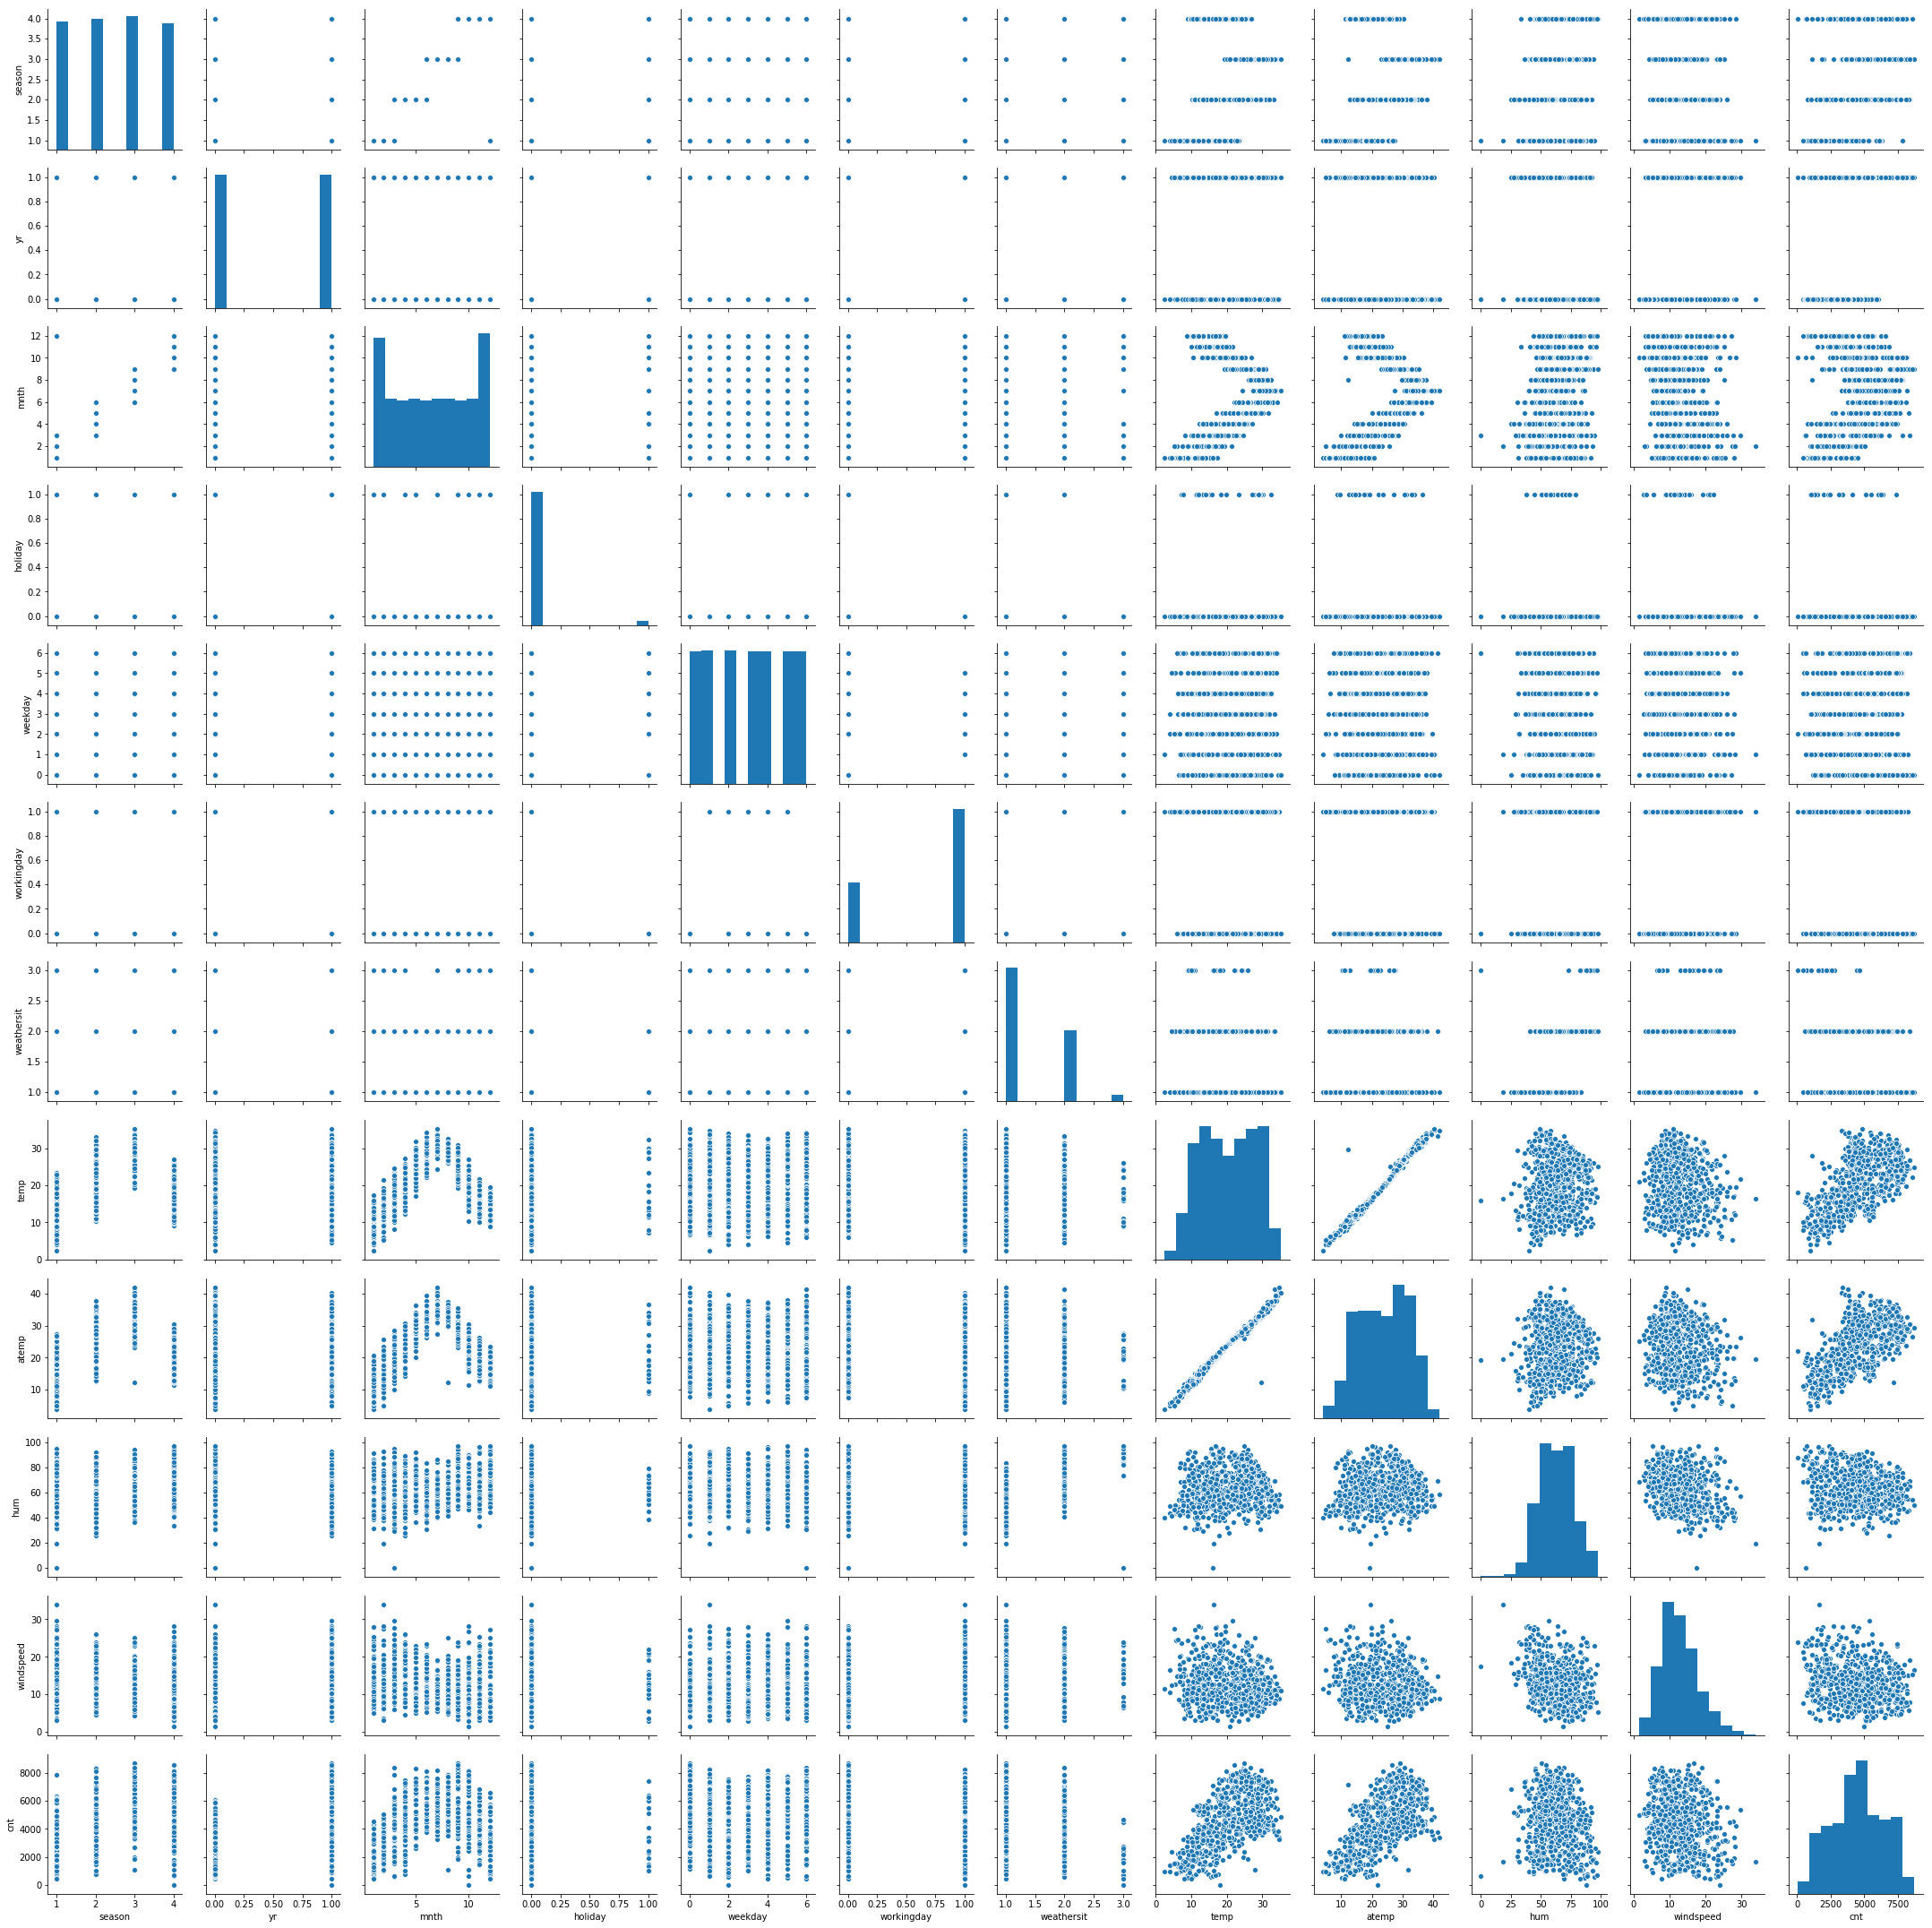

In [165]:
sns.pairplot(bike_new)
plt.show()

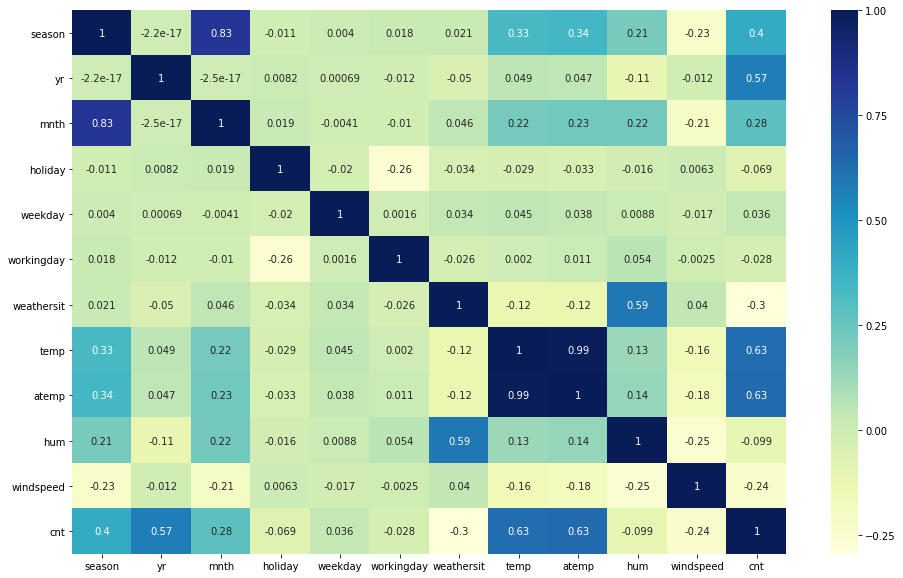

In [16]:
plt.figure(figsize=(16, 10))
sns.heatmap(bike_new.corr(),annot = True, cmap="YlGnBu")
plt.show()

# Creating Dummy Variables
We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. - Before creating dummy variables, we will have to convert them into 'category' data types. ---

In [166]:
# Check the datatypes before convertion
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.5 KB


In [167]:
# Convert to category data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null category
yr            730 non-null int64
mnth          730 non-null category
holiday       730 non-null int64
weekday       730 non-null category
workingday    730 non-null int64
weathersit    730 non-null category
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: category(4), float64(4), int64(4)
memory usage: 49.6 KB


In [169]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)


# We will visualise the changes after the dummy creation.

bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr              730 non-null int64
holiday         730 non-null int64
workingday      730 non-null int64
temp            730 non-null float64
atemp           730 non-null float64
hum             730 non-null float64
windspeed       730 non-null float64
cnt             730 non-null int64
season_2        730 non-null uint8
season_3        730 non-null uint8
season_4        730 non-null uint8
mnth_2          730 non-null uint8
mnth_3          730 non-null uint8
mnth_4          730 non-null uint8
mnth_5          730 non-null uint8
mnth_6          730 non-null uint8
mnth_7          730 non-null uint8
mnth_8          730 non-null uint8
mnth_9          730 non-null uint8
mnth_10         730 non-null uint8
mnth_11         730 non-null uint8
mnth_12         730 non-null uint8
weekday_1       730 non-null uint8
weekday_2       730 non-null uint8
weekday_3       730 non-null uint8
weekday_4   

In [170]:
bike_new.shape

(730, 30)

# Feature Analysis
We could create various new features that could be useful for this analysis as below. But, I am only mentioning the possible methods for the same.

In [171]:
bike_fe = bike

# Week number:
We will extract the week number (1-52) from the date (dteday) column provided

In [172]:
bike_fe["weekno"] = bike_fe["dteday"].dt.week

# Quarter:
We will calculate the Quarter from the month (mnth) column provided

In [173]:
bike_fe['qtr']=bike_fe['mnth']//4+1

# Registered to Casual user ratio:
We will calculate the registered to casual user ratio from the columns (registered & casual) provided

In [174]:
bike_fe['rc_ratio']=round((bike['registered']/bike_fe['casual']),1)

# Feeling to Actual temperature ratio:
We will calculate the Feeling (atemp) to actual (temp) temperature ratio from the columns provided

In [175]:
bike_fe['temp_ratio']=round(bike_fe['atemp']/bike_fe['temp'],1)

# Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [176]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)

As you might have noticed, cnt seems to the correlated to temperature the most. Let's see a pairplot for cnt vs temperature.

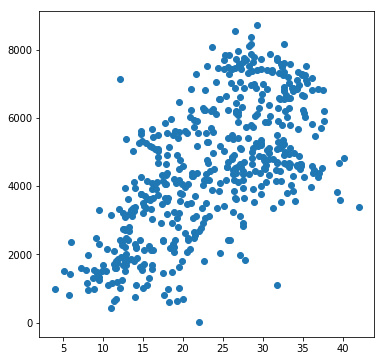

In [178]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

In [179]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 30 columns):
yr              510 non-null int64
holiday         510 non-null int64
workingday      510 non-null int64
temp            510 non-null float64
atemp           510 non-null float64
hum             510 non-null float64
windspeed       510 non-null float64
cnt             510 non-null int64
season_2        510 non-null uint8
season_3        510 non-null uint8
season_4        510 non-null uint8
mnth_2          510 non-null uint8
mnth_3          510 non-null uint8
mnth_4          510 non-null uint8
mnth_5          510 non-null uint8
mnth_6          510 non-null uint8
mnth_7          510 non-null uint8
mnth_8          510 non-null uint8
mnth_9          510 non-null uint8
mnth_10         510 non-null uint8
mnth_11         510 non-null uint8
mnth_12         510 non-null uint8
weekday_1       510 non-null uint8
weekday_2       510 non-null uint8
weekday_3       510 non-null uint8
weekday_4  

In [180]:
df_train.shape

(510, 30)

In [181]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 30 columns):
yr              219 non-null int64
holiday         219 non-null int64
workingday      219 non-null int64
temp            219 non-null float64
atemp           219 non-null float64
hum             219 non-null float64
windspeed       219 non-null float64
cnt             219 non-null int64
season_2        219 non-null uint8
season_3        219 non-null uint8
season_4        219 non-null uint8
mnth_2          219 non-null uint8
mnth_3          219 non-null uint8
mnth_4          219 non-null uint8
mnth_5          219 non-null uint8
mnth_6          219 non-null uint8
mnth_7          219 non-null uint8
mnth_8          219 non-null uint8
mnth_9          219 non-null uint8
mnth_10         219 non-null uint8
mnth_11         219 non-null uint8
mnth_12         219 non-null uint8
weekday_1       219 non-null uint8
weekday_2       219 non-null uint8
weekday_3       219 non-null uint8
weekday_4  

In [182]:
df_test.shape

(219, 30)

In [183]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [184]:
df_train[['season_2','season_3','season_4']].head(50)

,season_2,season_3,season_4
653,0,0,1
576,0,1,0
426,0,0,0
728,0,0,0
482,1,0,0
111,1,0,0
580,0,1,0
500,1,0,0
479,1,0,0
472,1,0,0


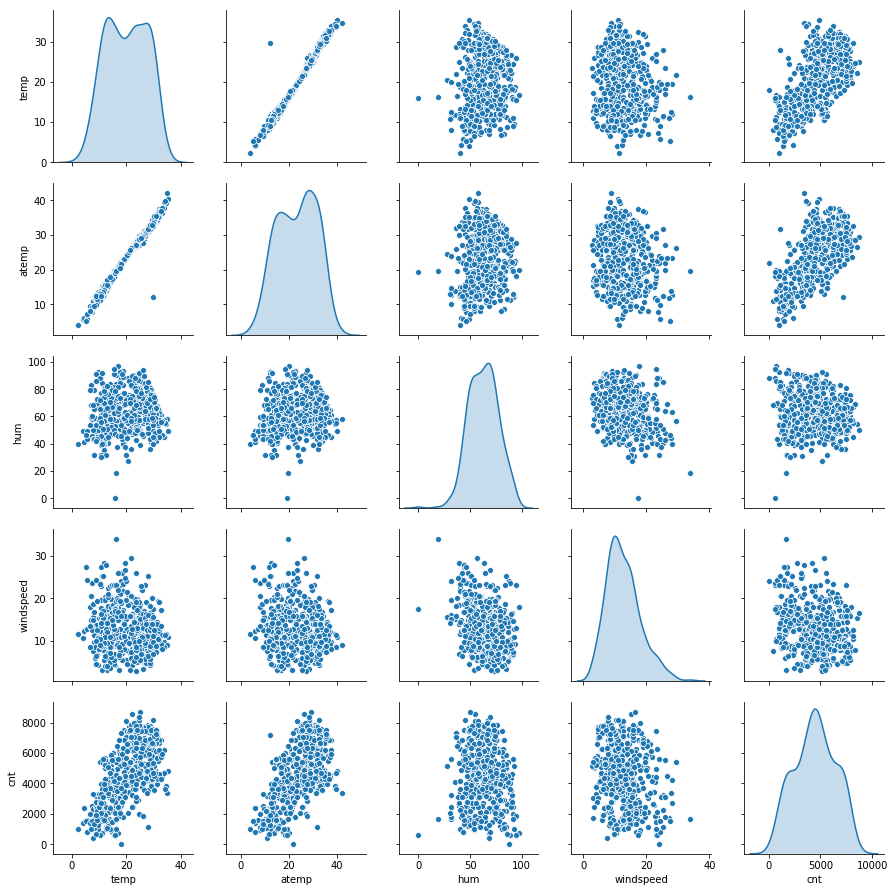

In [185]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

INSIGHT : The above pair-plot tells us that there  is a lINEAR RELATION between 'temp', 'atemp' and 'cnt'

# Visualising Categorical Variables

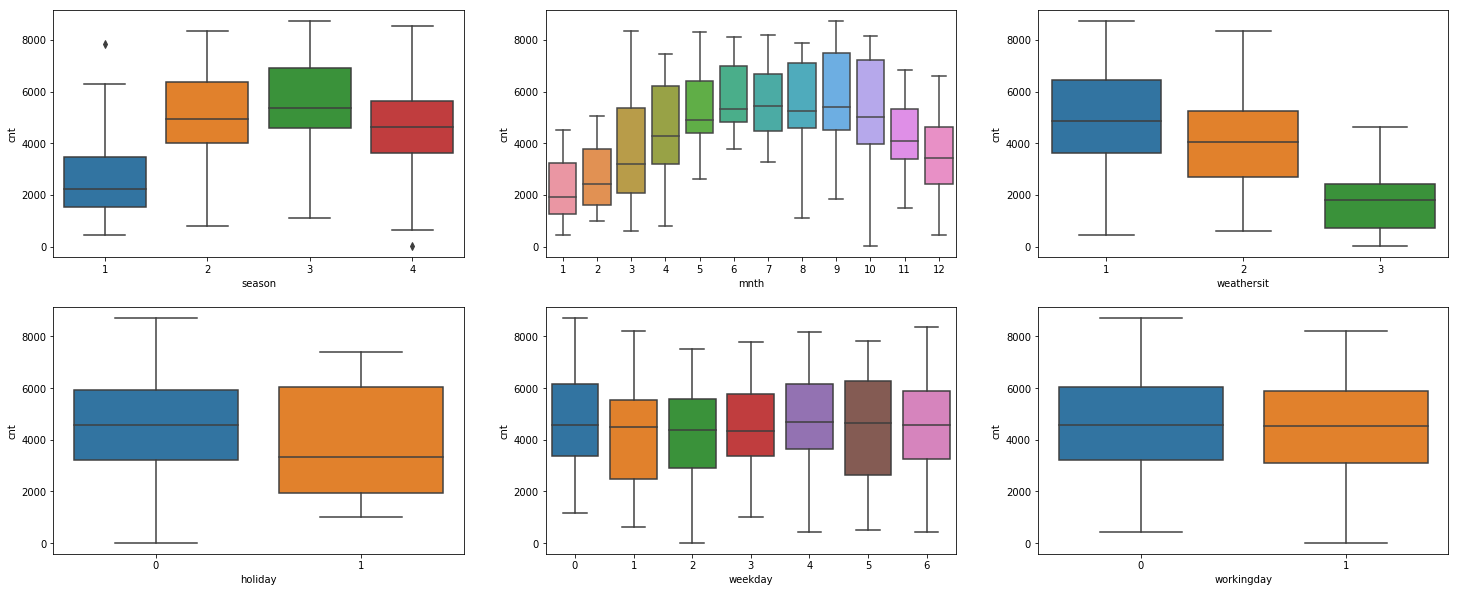

In [39]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

INSIGHT: There are 6 categorical variables in the dataset. We use Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) . The inference one can derive is: - season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable. - mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable. - weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings and can be a good predictor for the dependent variable. - holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable. - weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not. - workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable. ---

# Correlation Matrix

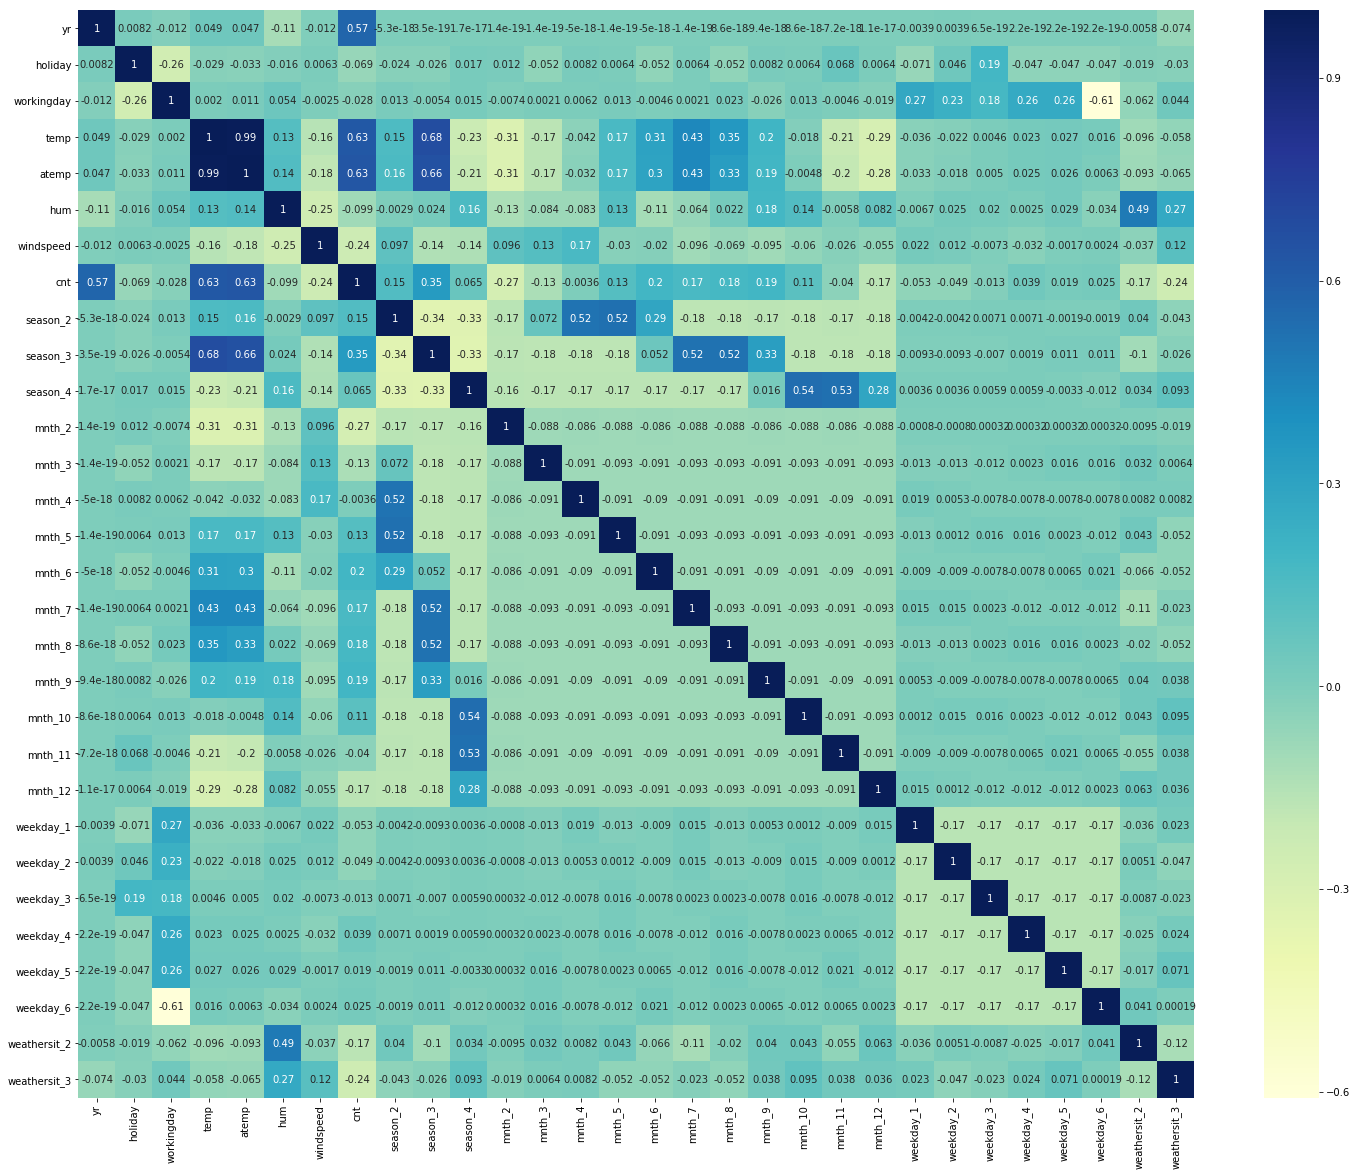

In [186]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here im considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="YlGnBu")
plt.show()

INSIGHT: - The heatmap clearly shows which variables are multicollinear in nature, and which variable have high collinearity with the target variable. - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model. ---

# Rescaling the features

In [189]:
from sklearn.preprocessing import MinMaxScaler

In [190]:
scaler = MinMaxScaler()

In [191]:
#checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,0,1,0


In [192]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [193]:
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [194]:
#checking values after scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,0,1,0


In [195]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building a LINEAR MODEL

### Assigning the X and Y Variables for Model building

In [196]:
y_train = df_train.pop("cnt")
X_train = df_train

RFE (Recursive Feature Elimination) We will be using the recursive feature elimination for the model building.Scikit learn has a Linear Regression algorithm which uses the RFE methodology

In [197]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of variables equal to 16
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [198]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 2),
 ('mnth_5', True, 1),
 ('mnth_6', False, 3),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [199]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [200]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [201]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building Linear Model using STATS MODEL

### Model 1

VIF Check

In [203]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,24.64
3,hum,15.55
6,season_3,8.80
4,windspeed,3.80
5,season_2,3.73
7,season_4,3.13
13,weathersit_2,2.15
0,yr,2.04
10,mnth_8,1.85
9,mnth_5,1.68


In [204]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [205]:
#check the parameters obtained
lr1.params

const           0.237574
yr              0.230385
holiday        -0.089060
temp            0.484667
hum            -0.178353
windspeed      -0.183595
season_2        0.115215
season_3        0.043588
season_4        0.153434
mnth_3          0.033322
mnth_5          0.030660
mnth_8          0.051139
mnth_9          0.120896
mnth_10         0.043662
weathersit_2   -0.055804
weathersit_3   -0.244542
dtype: float64

In [206]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.95e-189
Time:                        11:12:52   Log-Likelihood:                 514.85
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     494   BIC:                            -929.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2376      0.027      8.689   

# Model 2
NOTE: - Removing the variable 'hum' based on its Very High 'VIF' value. - Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'. ---

In [207]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

VIF check

In [208]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,15.99
5,season_3,8.42
4,season_2,3.68
3,windspeed,3.46
6,season_4,2.97
0,yr,2.04
9,mnth_8,1.85
8,mnth_5,1.68
11,mnth_10,1.62
12,weathersit_2,1.50


In [209]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [210]:
# Check the parameters obtained

lr2.params

const           0.136540
yr              0.234389
holiday        -0.090058
temp            0.450833
windspeed      -0.149773
season_2        0.121362
season_3        0.056459
season_4        0.148984
mnth_3          0.035027
mnth_5          0.020101
mnth_8          0.045322
mnth_9          0.110462
mnth_10         0.040484
weathersit_2   -0.083753
weathersit_3   -0.293342
dtype: float64

In [211]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.03e-185
Time:                        11:13:13   Log-Likelihood:                 503.66
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     495   BIC:                            -913.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1365      0.017      7.893   

# Model 3

NOTE: - Removing the variable 'season3' based on its Very High 'VIF' value. - Even though the VIF of season3 is second highest, we decided to drop 'season3' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'. ---

In [212]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

VIF Check

In [213]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.22
3,windspeed,3.32
4,season_2,2.31
0,yr,2.01
5,season_4,1.98
7,mnth_5,1.62
8,mnth_8,1.62
10,mnth_10,1.60
11,weathersit_2,1.50
9,mnth_9,1.35


In [214]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [215]:
# Check the parameters obtained

lr3.params

const           0.129308
yr              0.232811
holiday        -0.093004
temp            0.513804
windspeed      -0.153613
season_2        0.097888
season_4        0.131205
mnth_3          0.026771
mnth_5          0.011591
mnth_8          0.060241
mnth_9          0.123593
mnth_10         0.034108
weathersit_2   -0.083758
weathersit_3   -0.289535
dtype: float64

In [216]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.5
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.33e-185
Time:                        11:13:38   Log-Likelihood:                 500.65
No. Observations:                 510   AIC:                            -973.3
Df Residuals:                     496   BIC:                            -914.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1293      0.017      7.552   

# Model 4

NOTE: - Removing the variable 'mnth_5' based on its Very High p-value. ---

In [217]:
X_train_new = X_train_new.drop(["mnth_5"], axis = 1)

VIF Check

In [218]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.30
0,yr,2.01
5,season_4,1.98
4,season_2,1.82
7,mnth_8,1.61
9,mnth_10,1.60
10,weathersit_2,1.49
8,mnth_9,1.34
6,mnth_3,1.19


In [219]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [220]:
# Check the parameters obtained

lr4.params

const           0.129339
yr              0.232549
holiday        -0.093324
temp            0.515261
windspeed      -0.154872
season_2        0.101620
season_4        0.131008
mnth_3          0.025271
mnth_8          0.059354
mnth_9          0.122876
mnth_10         0.033888
weathersit_2   -0.083298
weathersit_3   -0.289706
dtype: float64

In [221]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.0
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.10e-186
Time:                        11:14:18   Log-Likelihood:                 500.43
No. Observations:                 510   AIC:                            -974.9
Df Residuals:                     497   BIC:                            -919.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1293      0.017      7.558   

# Model 5

Removing the variable mnth_3 based on its high p-value

In [222]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

VIF Check

In [223]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,season_4,1.95
4,season_2,1.82
8,mnth_10,1.60
6,mnth_8,1.59
9,weathersit_2,1.49
7,mnth_9,1.34
10,weathersit_3,1.09


In [224]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [225]:
# Check the parameters obtained

lr5.params

const           0.135532
yr              0.232775
holiday        -0.095944
temp            0.509119
windspeed      -0.151914
season_2        0.101534
season_4        0.126632
mnth_8          0.057223
mnth_9          0.121148
mnth_10         0.034188
weathersit_2   -0.083372
weathersit_3   -0.288317
dtype: float64

In [120]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          3.21e-187
Time:                        20:32:46   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1355      0.017      8.079   

# Model 6

Removing mnth_10 based on its high p-value

In [226]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

VIF

In [227]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.01
3,windspeed,3.10
0,yr,2.00
4,season_2,1.81
6,mnth_8,1.58
5,season_4,1.49
8,weathersit_2,1.48
7,mnth_9,1.31
9,weathersit_3,1.08
1,holiday,1.04


In [228]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [125]:
# Check the parameters obtained

lr6.params

const           0.131241
yr              0.232489
holiday        -0.097109
temp            0.517361
windspeed      -0.149737
season_2        0.099972
season_4        0.138343
mnth_8          0.054165
mnth_9          0.116177
weathersit_2   -0.082534
weathersit_3   -0.282834
dtype: float64

In [229]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.26e-187
Time:                        11:15:12   Log-Likelihood:                 496.97
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     499   BIC:                            -925.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1312      0.017      7.871   

<font color="red">
INSIGHT: - This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number). ---
</font>

# Final Model Interpretation
#### Hypothesis Testing:
- Hypothesis testing states that:
    - H0:B1=B2=...=Bn=0 
    - H1:  at least one  Bi!=0 

lr6 model coefficient values

- const 0.1312
- yr 0.2325
- holiday -0.0971
- temp 0.5174
- windspeed -0.1497
- season_2 0.1000
- season_4 0.1383
- mnth_8 0.0542
- mnth_9 0.1162
- weathersit_2 -0.0825
- weathersit_3 -0.2828

<font color="red">INSIGHT: - From the lr6 model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS ---</font>

# F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 251.3
- Prob (F-statistic): 1.26e-187
The F-Statistics value of 251 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### The equation of best fitted surface based on model lr6:

<font color="red">cnt=0.1312+(yr×0.2325)-(holiday×0.0971)+(temp×0.5174)−(windspeed×0.1497)+(season2×0.1000)+(season4×0.1383)+(mnth8×0.0542)+(mnth9×0.1162)−(weathersit2×0.0825)−(weathersit3×0.2828)</font>

### Interpretation of Coefficients:
- const: The Constant value of ‘0.1312’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.1312 units.

- yr: A coefficient value of ‘0.2325’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2325 units.   

- holiday: A coefficient value of ‘-0.0971’ indicated that, a unit increase in workingday variable decreases the bike hire numbers by 0.0971 units.

- temp: A coefficient value of ‘0.5174’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5174 units.

- windspeed: A coefficient value of ‘-0.1497’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1497 units.
    
- season_2: A coefficient value of ‘0.1000’ indicated that w.r.t season_1, a unit increase in season_2 variable increases the bike hire numbers by 0.1000 units.
    
- season_4: A coefficient value of ‘0.1383’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1383 units.
    
- mnth_8: A coefficient value of ‘0.0542’ indicated that w.r.t mnth_1, a unit increase in mnth_8 variable increases the bike hire numbers by 0.0542 units.
    
- mnth_9: A coefficient value of ‘0.1162’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.1162 units.
    
- weathersit_2: A coefficient value of ‘-0.0825’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.0825 units.
    
- weathersit_3: A coefficient value of ‘-0.02828’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.02828 units.
    
# VALIDATE ASSUMPTIONS

## Error terms are normally distributed with mean zero (not X, Y)
#### Residual Analysis Of Training Data

In [230]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

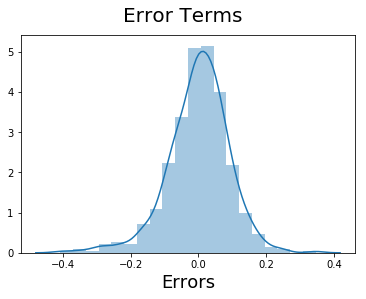

In [231]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

<font color="red">INSIGHT: - From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid. ---</font>

# MAKING PREDICTION USING FINAL MODEL
#### Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

Applying the scaling on the test sets

In [232]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

In [233]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,...,0.073059,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,...,0.260830,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X_test and y_test

In [234]:
y_test = df_test.pop('cnt')
X_test = df_test

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
yr              219 non-null int64
holiday         219 non-null int64
workingday      219 non-null int64
temp            219 non-null float64
atemp           219 non-null float64
hum             219 non-null float64
windspeed       219 non-null float64
season_2        219 non-null uint8
season_3        219 non-null uint8
season_4        219 non-null uint8
mnth_2          219 non-null uint8
mnth_3          219 non-null uint8
mnth_4          219 non-null uint8
mnth_5          219 non-null uint8
mnth_6          219 non-null uint8
mnth_7          219 non-null uint8
mnth_8          219 non-null uint8
mnth_9          219 non-null uint8
mnth_10         219 non-null uint8
mnth_11         219 non-null uint8
mnth_12         219 non-null uint8
weekday_1       219 non-null uint8
weekday_2       219 non-null uint8
weekday_3       219 non-null uint8
weekday_4       219 non-null uint8
weekday_5  

In [235]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)

X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
const           219 non-null float64
yr              219 non-null int64
holiday         219 non-null int64
temp            219 non-null float64
windspeed       219 non-null float64
season_2        219 non-null uint8
season_4        219 non-null uint8
mnth_8          219 non-null uint8
mnth_9          219 non-null uint8
weathersit_2    219 non-null uint8
weathersit_3    219 non-null uint8
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [236]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

# MODEL EVALUATION

Text(0, 0.5, 'y_pred')

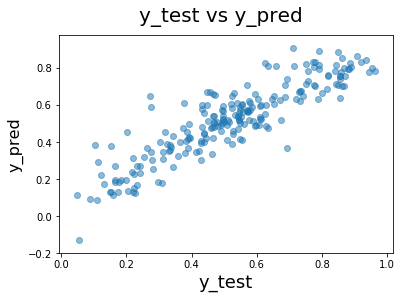

In [237]:
#Plotting y_pred and y_test to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

# R2 Value for TEST

In [238]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7931434526028905

#  Adjusted R^2 Value for TEST
#### Formula for Adjusted R^2

## R2adj.=1−(1−R2)∗n−1n−p−1

In [239]:
# Get the shape of X_test

X_test.shape

(219, 10)

In [240]:
# We already have the value of R^2 (calculated in above step)

r2=0.7931434526028905

In [241]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjusted_r2)

0.7831984262857219


# Final Result Comparision

<font color="red">FINAL RESULT COMPARISON: --- - Train R^2 :0.834 - Train Adjusted R^2 :0.831 --- - Test R^2 :0.79314 - Test Adjusted R^2 :0.78319 --- - This seems to be a really good model that can very well 'Generalize' various datasets. ---</font>

As per our final Model, the top 3 predictor variables that influences the bike booking are: --- - Temperature (temp) - A coefficient value of ‘0.5174’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5174 units. - Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.02828’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.02828 units. - Year (yr) - A coefficient value of ‘0.2325’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2325 units. --- SO IT IS RECOMMENDED TO GIVE THESE VARIABLES UTMOST IMPORTANCE WHILE PLANNING, TO ACHIEVE MAXIMUM BOOKING. --- The next best features that can also be considered are - - season_4: - A coefficient value of ‘0.1383’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1383 units. - windspeed: - A coefficient value of ‘ -0.1497’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1497 units. --- NOTE: - The details of weathersit_1 & weathersit_3 - weathersit_1: Clear, Few clouds, Partly cloudy, Partly cloudy - weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - The details of season1 & season4 - season1: spring - season4: winter